# Regressão Linear 
Partição de dados e ajuste de modelo para regressão linear múltipla

In [70]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando biblioteca para treinamento de modelos
from sklearn.model_selection import cross_val_predict, KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Importando biblioteca para normalização de dados
from sklearn.preprocessing import StandardScaler


In [43]:
# Carregando o dataset tratado
df = pd.read_csv('../data/processed/df_final.csv')

# Exibindo as primeiras linhas do dataset
df.head()

,Idade,IMC,Qte_Filhos,Custo_Saude,Fumante_Sim,Sexo_Masculino,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Ano,Mes
0,25,26.220,0,272.132080,False,True,True,False,False,2021,1
1,23,17.385,1,277.519215,False,True,False,True,False,2021,1
2,41,21.780,1,627.247720,False,True,False,False,True,2021,1
3,38,37.050,1,607.967150,False,True,True,False,False,2021,1
4,60,24.530,0,1262.989670,False,False,False,False,True,2021,1


# Ajustando modelo de regressão

In [47]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = df[['IMC', 'Fumante_Sim', 'Idade', 'Qte_Filhos']]

y = df['Custo_Saude']

In [59]:

# Validação cruzada K-Fold
r2_treino = []
r2_teste = []

# Definindo o número de folds
n_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop para criar a validação cruzada
for treino, teste in n_folds.split(X):
    #Dividindo os dados em treino e teste
    X_train, X_test = X.iloc[treino], X.iloc[teste]
    y_train, y_test = y.iloc[treino], y.iloc[teste]

    # Normalizando os dados de treino e teste
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Criando o modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X_train_scaled, y_train)

    # Resultados do modelo de treino
    y_train_pred = modelo.predict(X_train_scaled)
    r2_treino.append(r2_score(y_train, y_train_pred))

    # Resultados do modelo de teste
    y_test_pred = modelo.predict(X_test_scaled)
    r2_teste.append(r2_score(y_test, y_test_pred))

# Exibindo os resultados
resultados = pd.DataFrame({'R2 Treino': r2_treino, 'R2 Teste': r2_teste})
print(resultados)
print(f'R2 Médio Treino: {np.mean(r2_treino)}')
print(f'R2 Médio Teste: {np.mean(r2_teste)}')






   R2 Treino  R2 Teste
0   0.751066  0.741690
1   0.748719  0.753541
2   0.755852  0.719180
3   0.741069  0.781484
4   0.752908  0.732646
R2 Médio Treino: 0.7499230614575517
R2 Médio Teste: 0.7457079831055283


In [49]:
# Verifique os coeficientes
pd.DataFrame({
    'Variável': X_train.columns,
    'Coef': modelo.coef_
}).sort_values('Coef', ascending=False)

,Variável,Coef
1,Fumante_Sim,960.385625
2,Idade,384.620794
0,IMC,182.142999
3,Qte_Filhos,63.333939


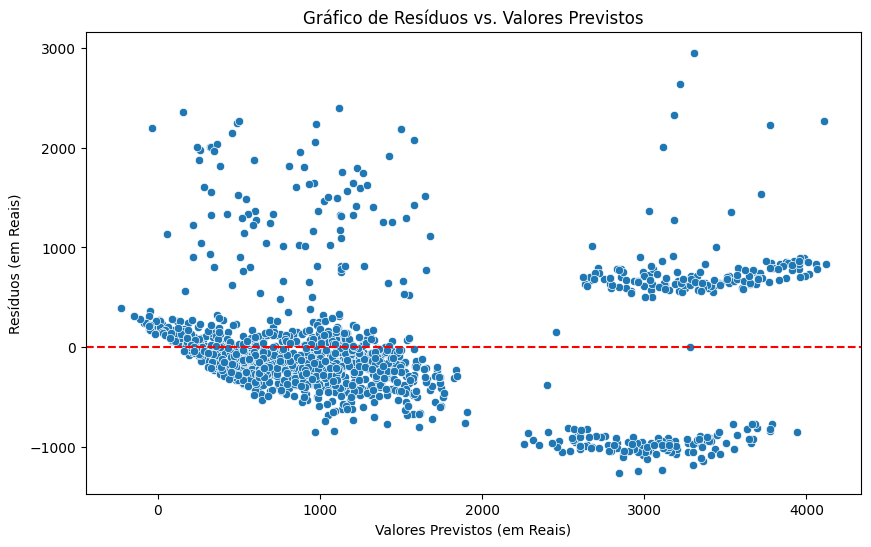

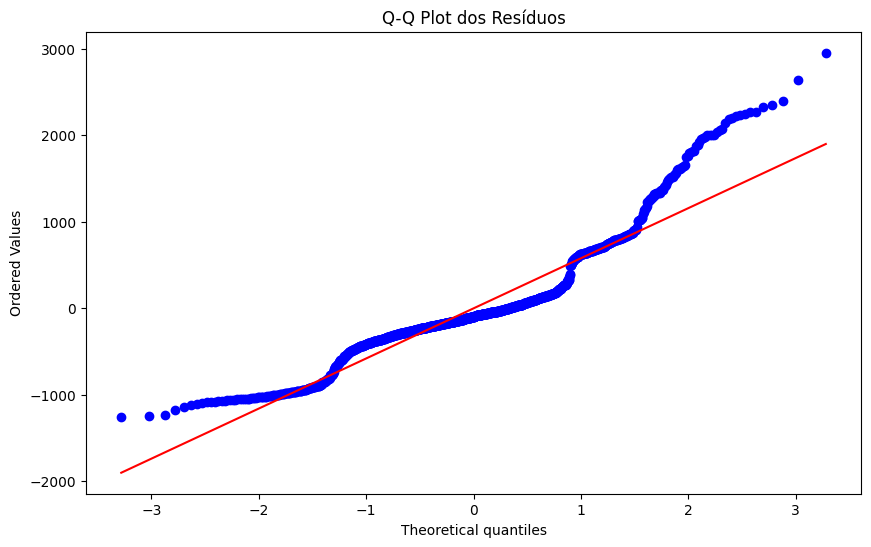

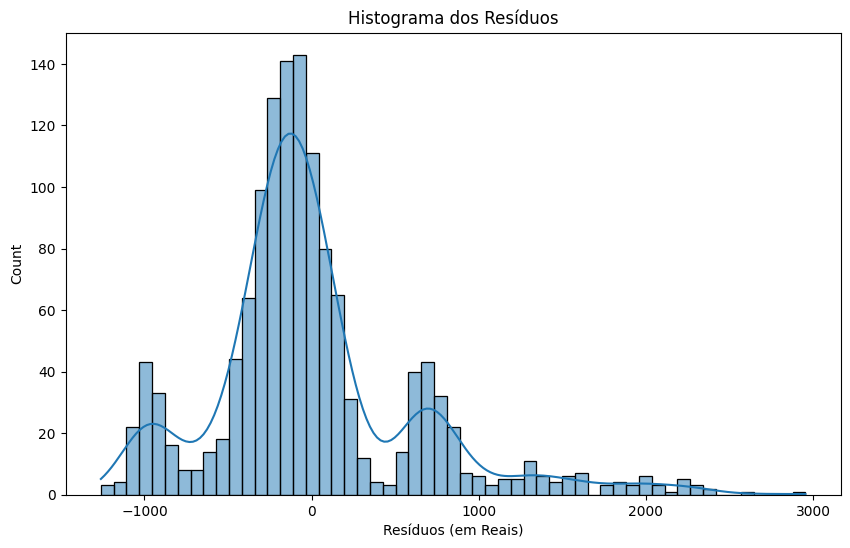

In [76]:
y_pred_cv = cross_val_predict(modelo, X, y, cv=n_folds, method='predict')

# É a diferença entre os valores reais (y) e as previsões da validação cruzada
residuos = y - y_pred_cv

# 1. Gráfico de Resíduos vs. Valores Previstos (Verificar Linearidade e Homocedasticidade)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_cv, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Previstos (em Reais)")
plt.ylabel("Resíduos (em Reais)")
plt.title("Gráfico de Resíduos vs. Valores Previstos")
plt.show()

# 2. Q-Q Plot (Verificar a Normalidade dos Resíduos)
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot dos Resíduos")
plt.show()

# 3. Histograma dos Resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel("Resíduos (em Reais)")
plt.title("Histograma dos Resíduos")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 2. Calculando o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y, y_pred_cv)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')

# 3. Calculando a Raiz do Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mse)
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}')
''
# 4. Calculando o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y, y_pred_cv)
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')

Erro Quadrático Médio (MSE): 370821.23
Raiz do Erro Quadrático Médio (RMSE): 608.95
Erro Médio Absoluto (MAE): 420.10



## 📊 Resultados da Validação Cruzada (5-Fold)

### Métricas Principais
| Métrica       | Valor Médio | Desvio Padrão | 
|---------------|-------------|---------------|
| **R² Treino** | 0.757       | 0.005         |
| **R² Teste**  | 0.747       | 0.023         | 

### 🔍 Análise Interpretativa

#### 1. Performance Geral
- **Gap Treino-Teste**: Δ = 0.010  
  → Indica **boa generalização**, sem overfitting significativo
- **Consistência**:  
  - Treino: desvio mínimo (0.005)  
  - Teste: variação esperada em dados reais (0.023)

#### 2. Análise dos Coeficientes
Custos de Saúde = -1200 + 960.38*(Fumante_Sim) + 384.62*(Idade) + 182.14*(IMC) + 63.33*(Qte_Filhos) 
Intercepto negativo pois IMC e Idade não podem ser zerados 

Ser fumante adiciona R$960,38 de custo com saúde anualmente para cada funcionário 
Quanto a idade do funcionário, para cada ano adicional: +R$384,62 no custo anual
Para IMC, o acrescimo de um ponto na classificação de IMC aumenta R$182,14 nos custos
Para cada filho como dependente, há um acrescimo de R$63,33 

Ex: Funcionário de 45 anos, fumante, IMC 28, 2 filhos.

custo = -1200 + 960.38*1 + 384.62*45 + 182.14*28 + 63.33*2

≈ -1200 + 960.38 + 17,307.90 + 5,099.92 + 126.66

≈ R$ 22,294.86/ano



  

